In [1]:
# Running in Google Colab? Run this cell
!wget https://zenodo.org/record/569876/files/alldata.hdf

# If you're not running in Colab,
# run the command without the leading '!' in the terminal on your computer.
# This file is too large for us to include on GitHub.

--2025-06-10 23:13:53--  https://zenodo.org/record/569876/files/alldata.hdf
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.43.25, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/569876/files/alldata.hdf [following]
--2025-06-10 23:13:53--  https://zenodo.org/records/569876/files/alldata.hdf
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 298803079 (285M) [application/octet-stream]
Saving to: ‘alldata.hdf’

alldata.hdf         100%[===================>] 284.96M  24.0MB/s    in 14s     

2025-06-10 23:14:07 (21.0 MB/s) - ‘alldata.hdf’ saved [298803079/298803079]



# Challenge 1 Analyze Gaia Data With Pandas

##Section 1: Introduction

Young star clusters are fruitful for astronomers interested in how stars form and evolve.
These are places where lots of stars have recently formed.
The Gaia mission provides the 3D location and proper motions for over 1 billion stars, making it the perfect telescope to discover new star clusters and further characterize known clusters.

In this challenge, you'll be using [Matplotlib](https://matplotlib.org), and [Pandas](http://pandas.pydata.org) to explore a piece of the initial Gaia data release.

##Section 2: The Data
This dataset combines Hipparcos and Tycho-2 data with new Gaia observations to provide accurate 3D positions and proper motions (i.e., the 2D angular velocity) on the sky.

For this exercise, we've collected the relevant data and stored it in the HDF5 data file (alldata.hdf) which you will need to download using the cell at the top of this notebook. This file can take a few minutes to download on Colab so be patient.

If you are interested, the full datasets can be downloaded in chunks from the Gaia website, [here](http://cdn.gea.esac.esa.int/Gaia/tgas_source/). A description of all of the columns can be found [here](https://gaia.esac.esa.int/documentation/GDR1/datamodel/Ch1/tgas_source.html).

###Section 2.1: Loading the data
Since this data uses a different file format (HDF5), we'll need to use the pandas `read_hdf()` method.

1. Load the data using `pd.read_hdf()` to load this HDF5 file.

2. Print the DataFrame to see what it looks like.

In [5]:
# Import pandas
import pandas as pd

df = pd.read_hdf('alldata.hdf')
print(df)
# Add code as needed

                 source_id  ref_epoch          ra  ra_error       dec  \
0            7627862074752     2015.0   45.034330  0.305989  0.235392   
1            9277129363072     2015.0   45.165007  2.583882  0.200068   
2           13297218905216     2015.0   45.086155  0.213836  0.248825   
3           13469017597184     2015.0   45.066542  0.276039  0.248211   
4           15736760328576     2015.0   45.136038  0.170697  0.335044   
...                    ...        ...         ...       ...       ...   
34070  6917488998546378368     2015.0  314.741700  0.277332 -0.423197   
34071  6917493705830041600     2015.0  314.643818  0.359097 -0.324975   
34072  6917504975824469248     2015.0  315.282880  0.472265 -0.343177   
34073  6917517998165066624     2015.0  314.740648  0.192053 -0.228114   
34074  6917521537218608640     2015.0  314.960731  0.491821 -0.221301   

       dec_error  parallax  parallax_error       pmra  pmra_error      pmdec  \
0       0.218802  6.352951        0.307910 

How many rows and columns are in this DataFrame?

In [6]:
print(f'{df.shape[0]:d} rows')
print(f'{df.shape[1]:d} columns')

2057050 rows
17 columns


Each star in the data set has the following important columns:
- Right Ascension (ra)
- Declination (dec)
- Galactic longitude (l)
- Galactic latitute (b)
- Parallax
- Proper motion along the right ascension axis (pmra)
- Proper motion along the declination axis (pmdec)

The DataFrame also contains the error columns for many of these quantities.

If you're interested in learning more about these quantities, see this Wikipedia page on [Star Positions](https://en.wikipedia.org/wiki/Star_position).

We can see how much memory our DataFrame object is taking up with:

In [7]:
print(f'{df.shape[0]:d} rows')
print(f'{df.memory_usage(index=True, deep=True).sum()/1e6:.1f} MB')

2057050 rows
296.2 MB


##Section 3: Selecting only important columns
We can try reducing this by only keeping the columns we'll be working with, which are `ra`, `dec`, and `parallax`.

Create a new DataFrame that only contains the columns mentioned above.

In [8]:
new_df = df[['ra', 'dec', 'parallax']]

How much memory does this reduced DataFrame use?

How does the size compare to the DataFrame that contained all of the columns? Use the previous example to help out on this part.

In [9]:
print(f'{new_df.memory_usage(index=True, deep=True).sum()/1e6:.1f} MB')

65.8 MB


##Section 4: Plotting
The DataFrame object contains some built-in functions for quickly getting a sense of your data. For example, we can quickly make histograms of separate columns with the `df.hist()` method.

**Plot histograms of the 'ra', 'dec' and 'parallax' columns by filling in the missing code below:**

array([<Axes: title={'center': 'ra'}>, <Axes: title={'center': 'dec'}>,
       <Axes: title={'center': 'parallax'}>], dtype=object)

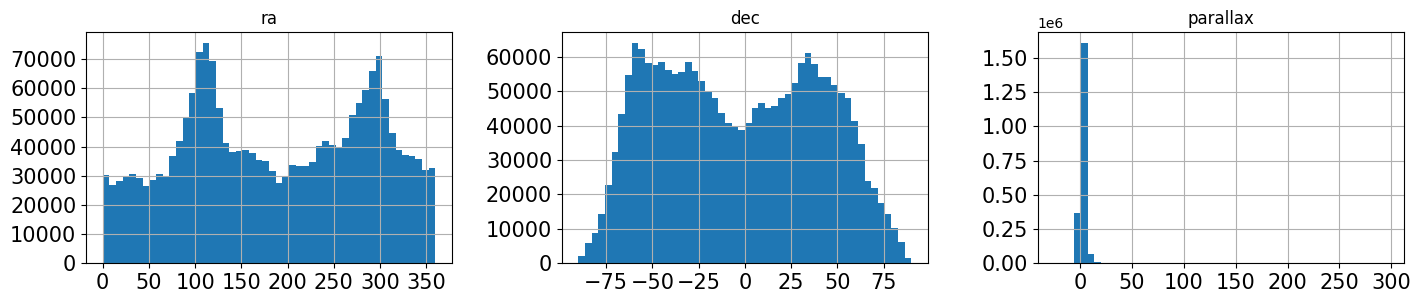

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(17, 3))
new_df.hist(['ra','dec', 'parallax'],
             ax=axes,
             xlabelsize=15,
             ylabelsize=15,
             bins=50)

###Section 4: Negative Parallaxes
We can see right away that Gaia is an all sky survey as it covers the full range of right ascension and declination. The parallax histogram looks a little funny though. There seems to be some bad parallax data that we should remove before proceeding. Remember that parallax is related to distance via

$$\text{distance in pc} = 1 / (\text{parallax in arcsec}).$$

The Gaia parallaxes are reported in *milliarcsececonds*, thus the distances will be in *kpc*.
From looking at the histogram for parallax we see a problem—there are a number of negative parallaxes, which would correspond to negative distances.

**Slice the DataFrame to see how many rows have a negative parallax.**

In [16]:
len(new_df.where(new_df['parallax'] < 0).dropna())

30840

**Create a new DataFrame that doesn't contain the rows with negative parallaxes by adjusting the code below.**

We use the `copy()` method which is good to do after you perform some sort of filtering on a DataFrame.
We also reset the index column so that there aren't gaps from the missing rows.
If you don't do these steps, then pandas may give warnings on future steps.

In [35]:
non_neg_parallax_df = new_df.where(new_df['parallax'] >= 0).dropna().copy()
non_neg_parallax_df.reset_index(drop=True, inplace=True)

**How many stars represented in this new DataFrame?**

In [36]:
non_neg_parallax_df.shape[0]

2026210

Recreate the three histograms we made earlier (ra, dec and parallax) on this filtered DataFrame.

array([<Axes: title={'center': 'ra'}>, <Axes: title={'center': 'dec'}>,
       <Axes: title={'center': 'parallax'}>], dtype=object)

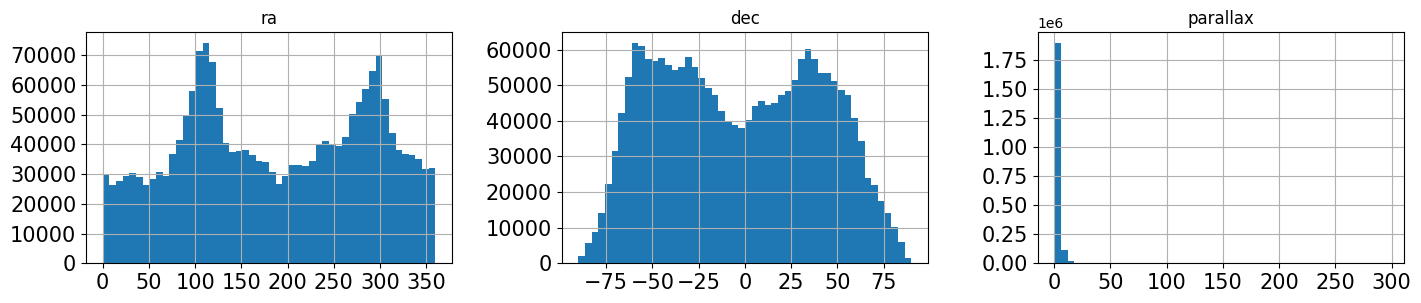

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(17, 3))
non_neg_parallax_df.hist(['ra','dec', 'parallax'],
             ax=axes,
             xlabelsize=15,
             ylabelsize=15,
             bins=50)

##Section 5: Calculating distances to the stars

**Use the relationship between parallax and distance to add a new column named 'dist' that contains the distances to the stars.** Recall that the parallaxes are reported in milliarcseconds.

In [39]:
non_neg_parallax_df['dist'] = 1/non_neg_parallax_df['parallax']

**What is the distance to the nearest star in the sample?**

In [40]:
min(non_neg_parallax_df['dist'])

0.0033806210359973816

**What is the mean distance of all the stars?**

In [41]:
print(non_neg_parallax_df['dist'].mean())

1.5070041609377756


Let's visualize the 2D positions of the stars in our sample. Create a simple scatter plot of the `ra` and `dec` values using `df.plot.scatter(x, y)`.

**What observation can you make about the dataset from this plot?**

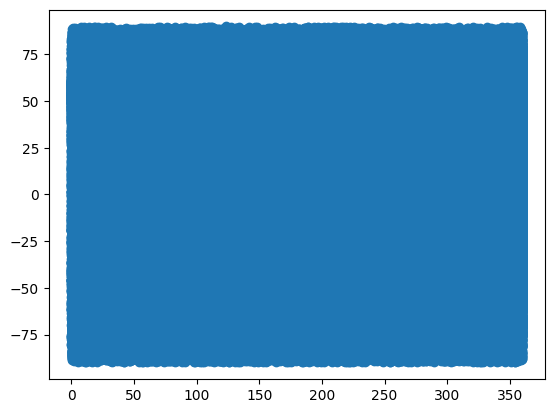

In [42]:
plt.scatter(non_neg_parallax_df['ra'], non_neg_parallax_df['dec'])

Another way to visualize this data is to create a 2D histogram and represent it as a *heatmap*. Instead of viewing the positions of individual stars, we view it as a density distribution of the stars.
One of the methods of doing this is with `hexbin`.

Create a new plot by replacing `scatter` with `hexbin.` Then play around with the attributes to get a really cool looking plot: Try setting `gridsize` to values between 30 and 300 (you'll see a noticeable difference). To adjust the colors, try setting the optional `cmap` argument equal to "inferno" or "gray."
Visit this page to learn more about [choosing colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

**How would you describe the shape of the stellar density distribution you obtain?**
By the way, what you're seeing is the Milky Way through the eyes of Gaia!


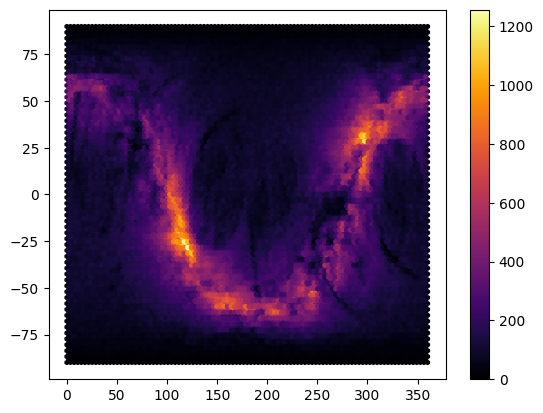

In [49]:
plt.hexbin(non_neg_parallax_df['ra'], non_neg_parallax_df['dec'], cmap='inferno')
plt.colorbar()

#cool!!!

## Section 6: Plot the Milky Way
We originally stripped out the columns l and b from the original DataFrame to make our plot.
Refer to the original DataFrame and create a new copy that keeps "parallax", "l" and "b" as columns.
Then make a plot using `hexbin` using "l" along the x-axis and "b" along the y-axis.

The center of the Milky Way is at (l, b) = (0, 0).

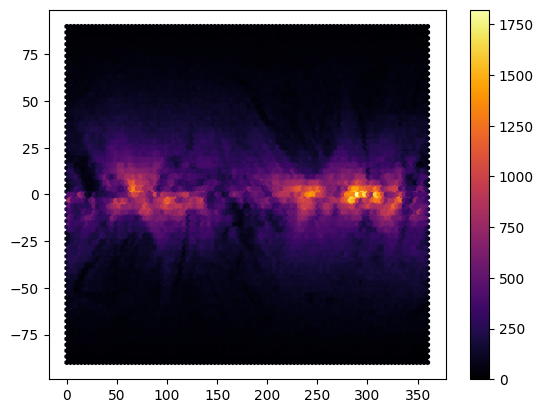

In [53]:
df_copy = df[['parallax', 'l', 'b']].copy()
plt.hexbin(df_copy['l'], df_copy['b'], cmap='inferno')
plt.colorbar()